In [1]:
from river.metrics import RMSE
from src.plot import Plots
from src.data import get_friedman_datasets, get_hyperplane_datasets
from src.models import get_models
from utils import evaluate

Evaluating HTR-AQO-Triangular on 
        Hyperplane
        Seed = 29
        Drift Feat: 1
        Magnitude: 0.7014991999890065
        Noise: 0.010332533899943375
Final RMSE: 0.0416: 0.041600
--------------------------------------------------
Evaluating HTR-QO (baseline) on 
        Hyperplane
        Seed = 29
        Drift Feat: 1
        Magnitude: 0.7014991999890065
        Noise: 0.010332533899943375
Final RMSE: 0.042169: 0.042169
--------------------------------------------------
Evaluating HTR-AQO-Triangular on 
        Hyperplane
        Seed = 98
        Drift Feat: 10
        Magnitude: 0.8596976848810731
        Noise: 0.9629516087430816
Final RMSE: 0.34492: 0.344920
--------------------------------------------------
Evaluating HTR-QO (baseline) on 
        Hyperplane
        Seed = 98
        Drift Feat: 10
        Magnitude: 0.8596976848810731
        Noise: 0.9629516087430816
Final RMSE: 0.344884: 0.344884
--------------------------------------------------


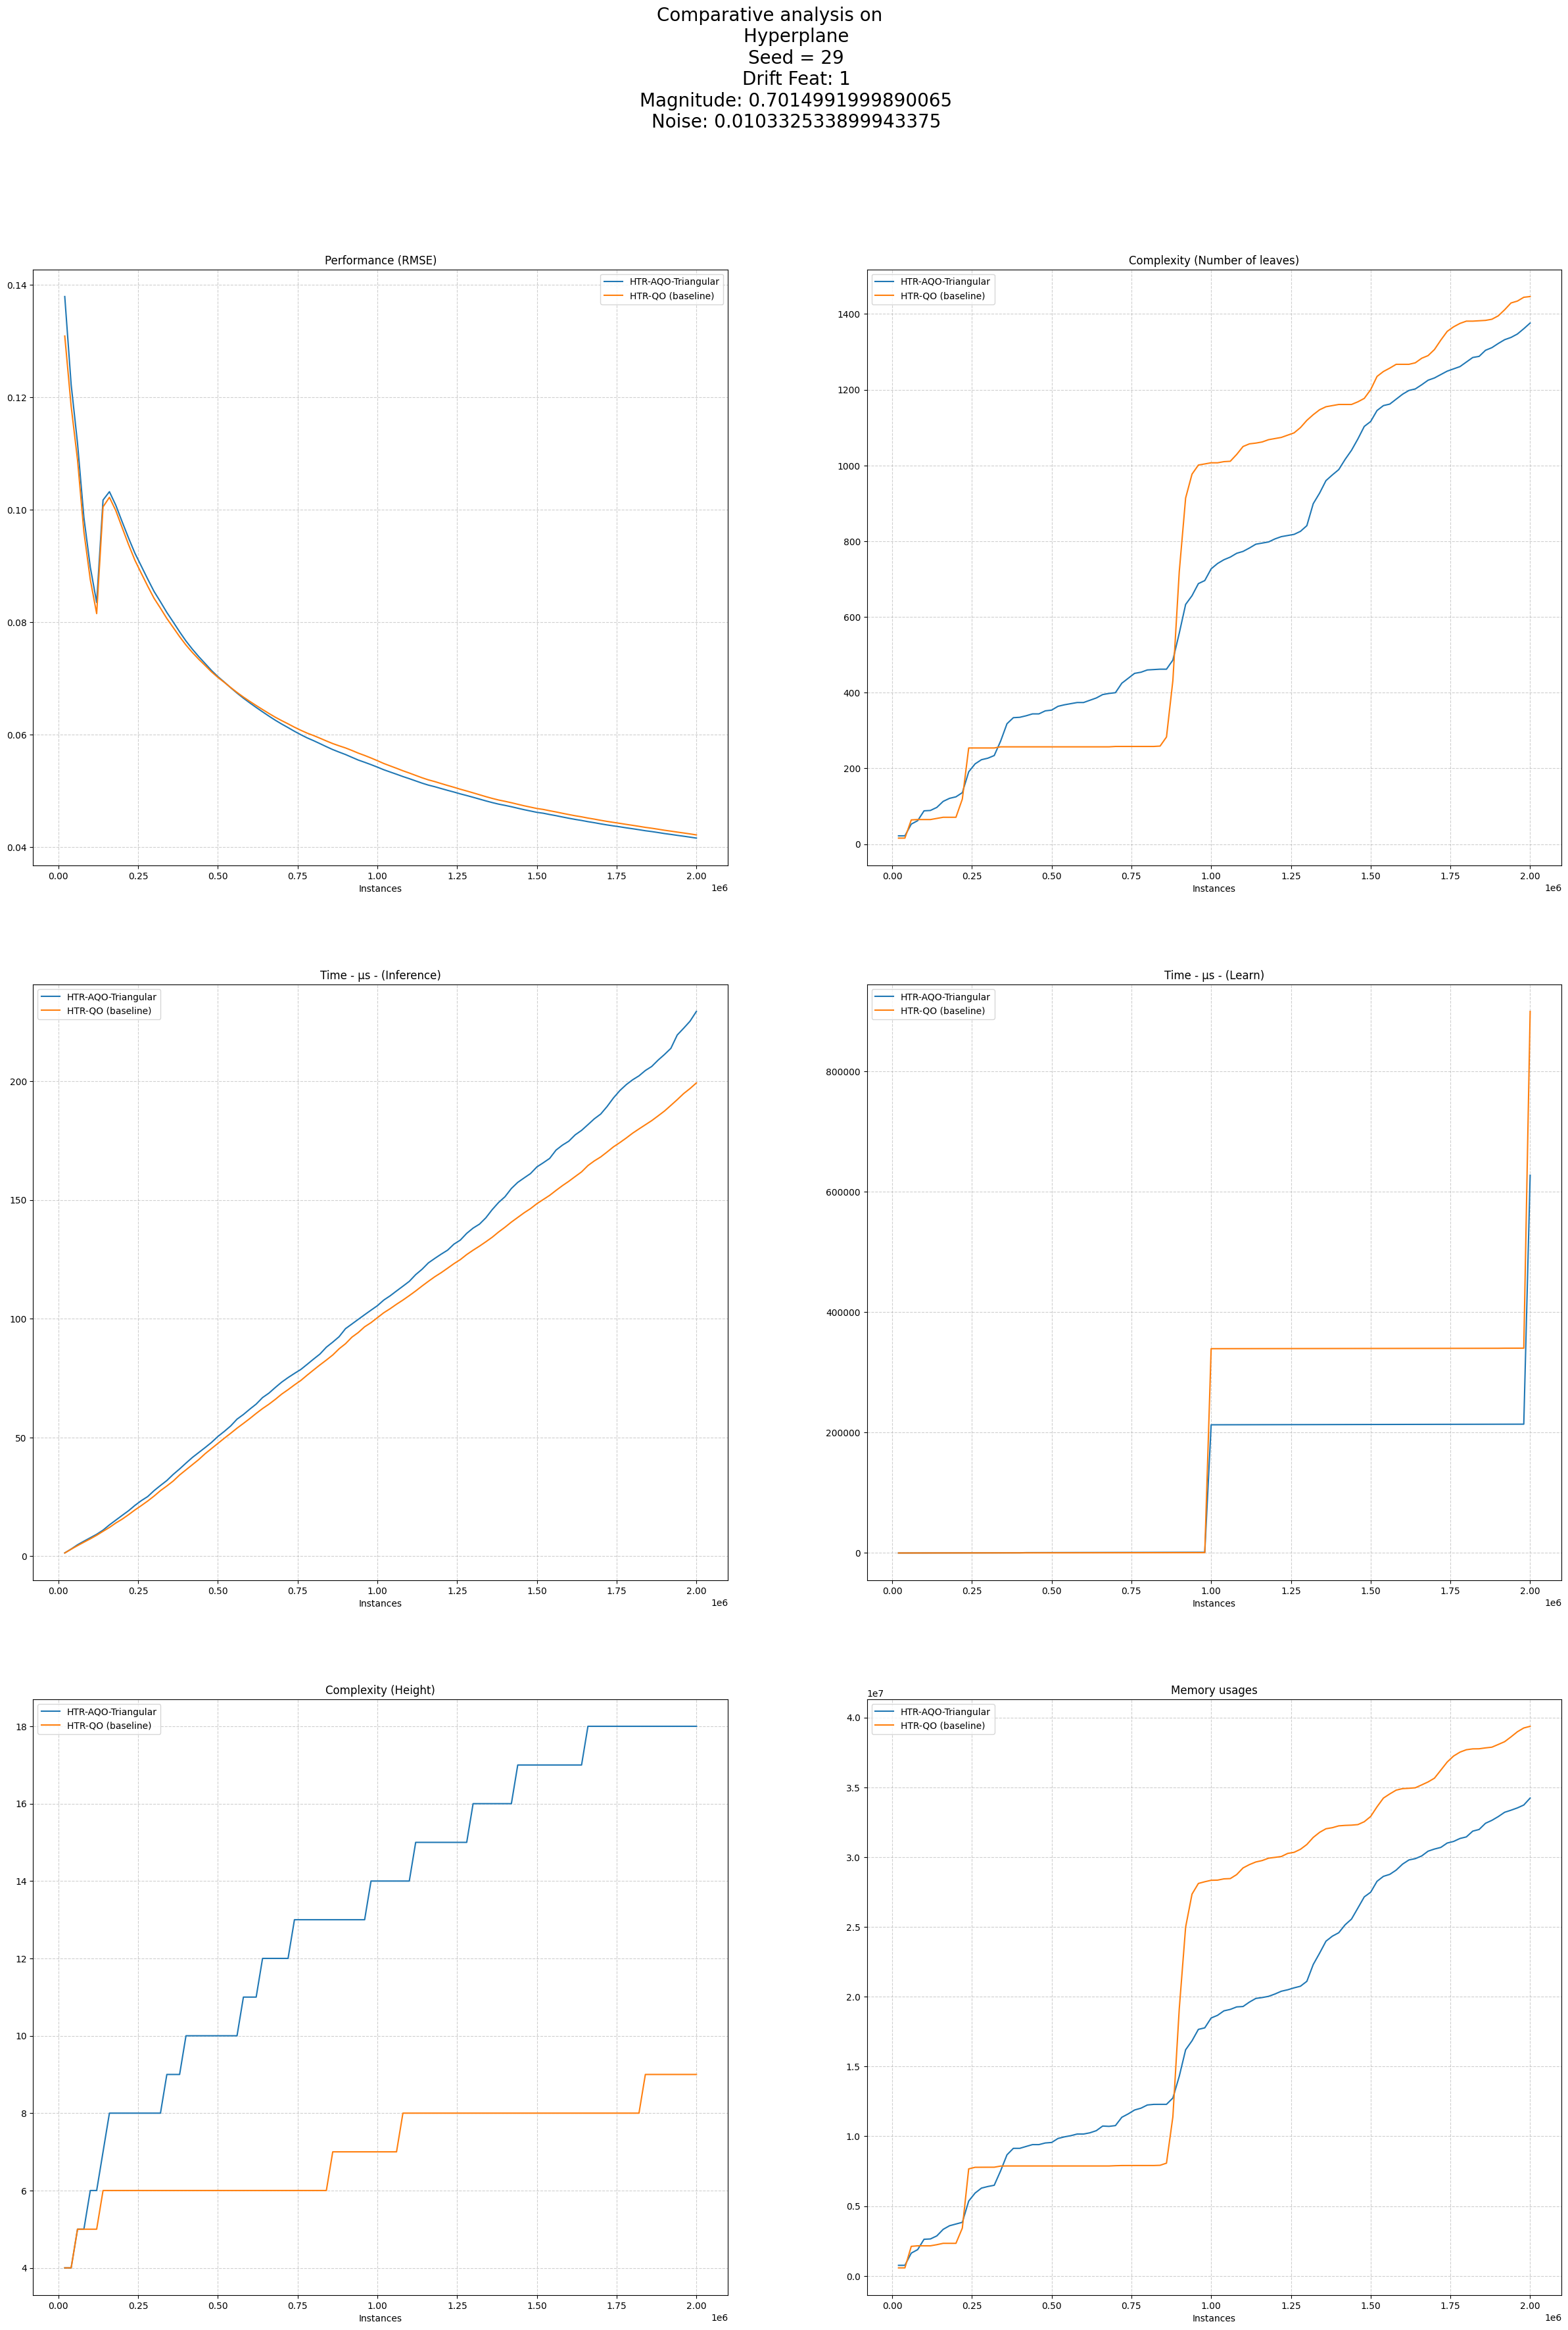

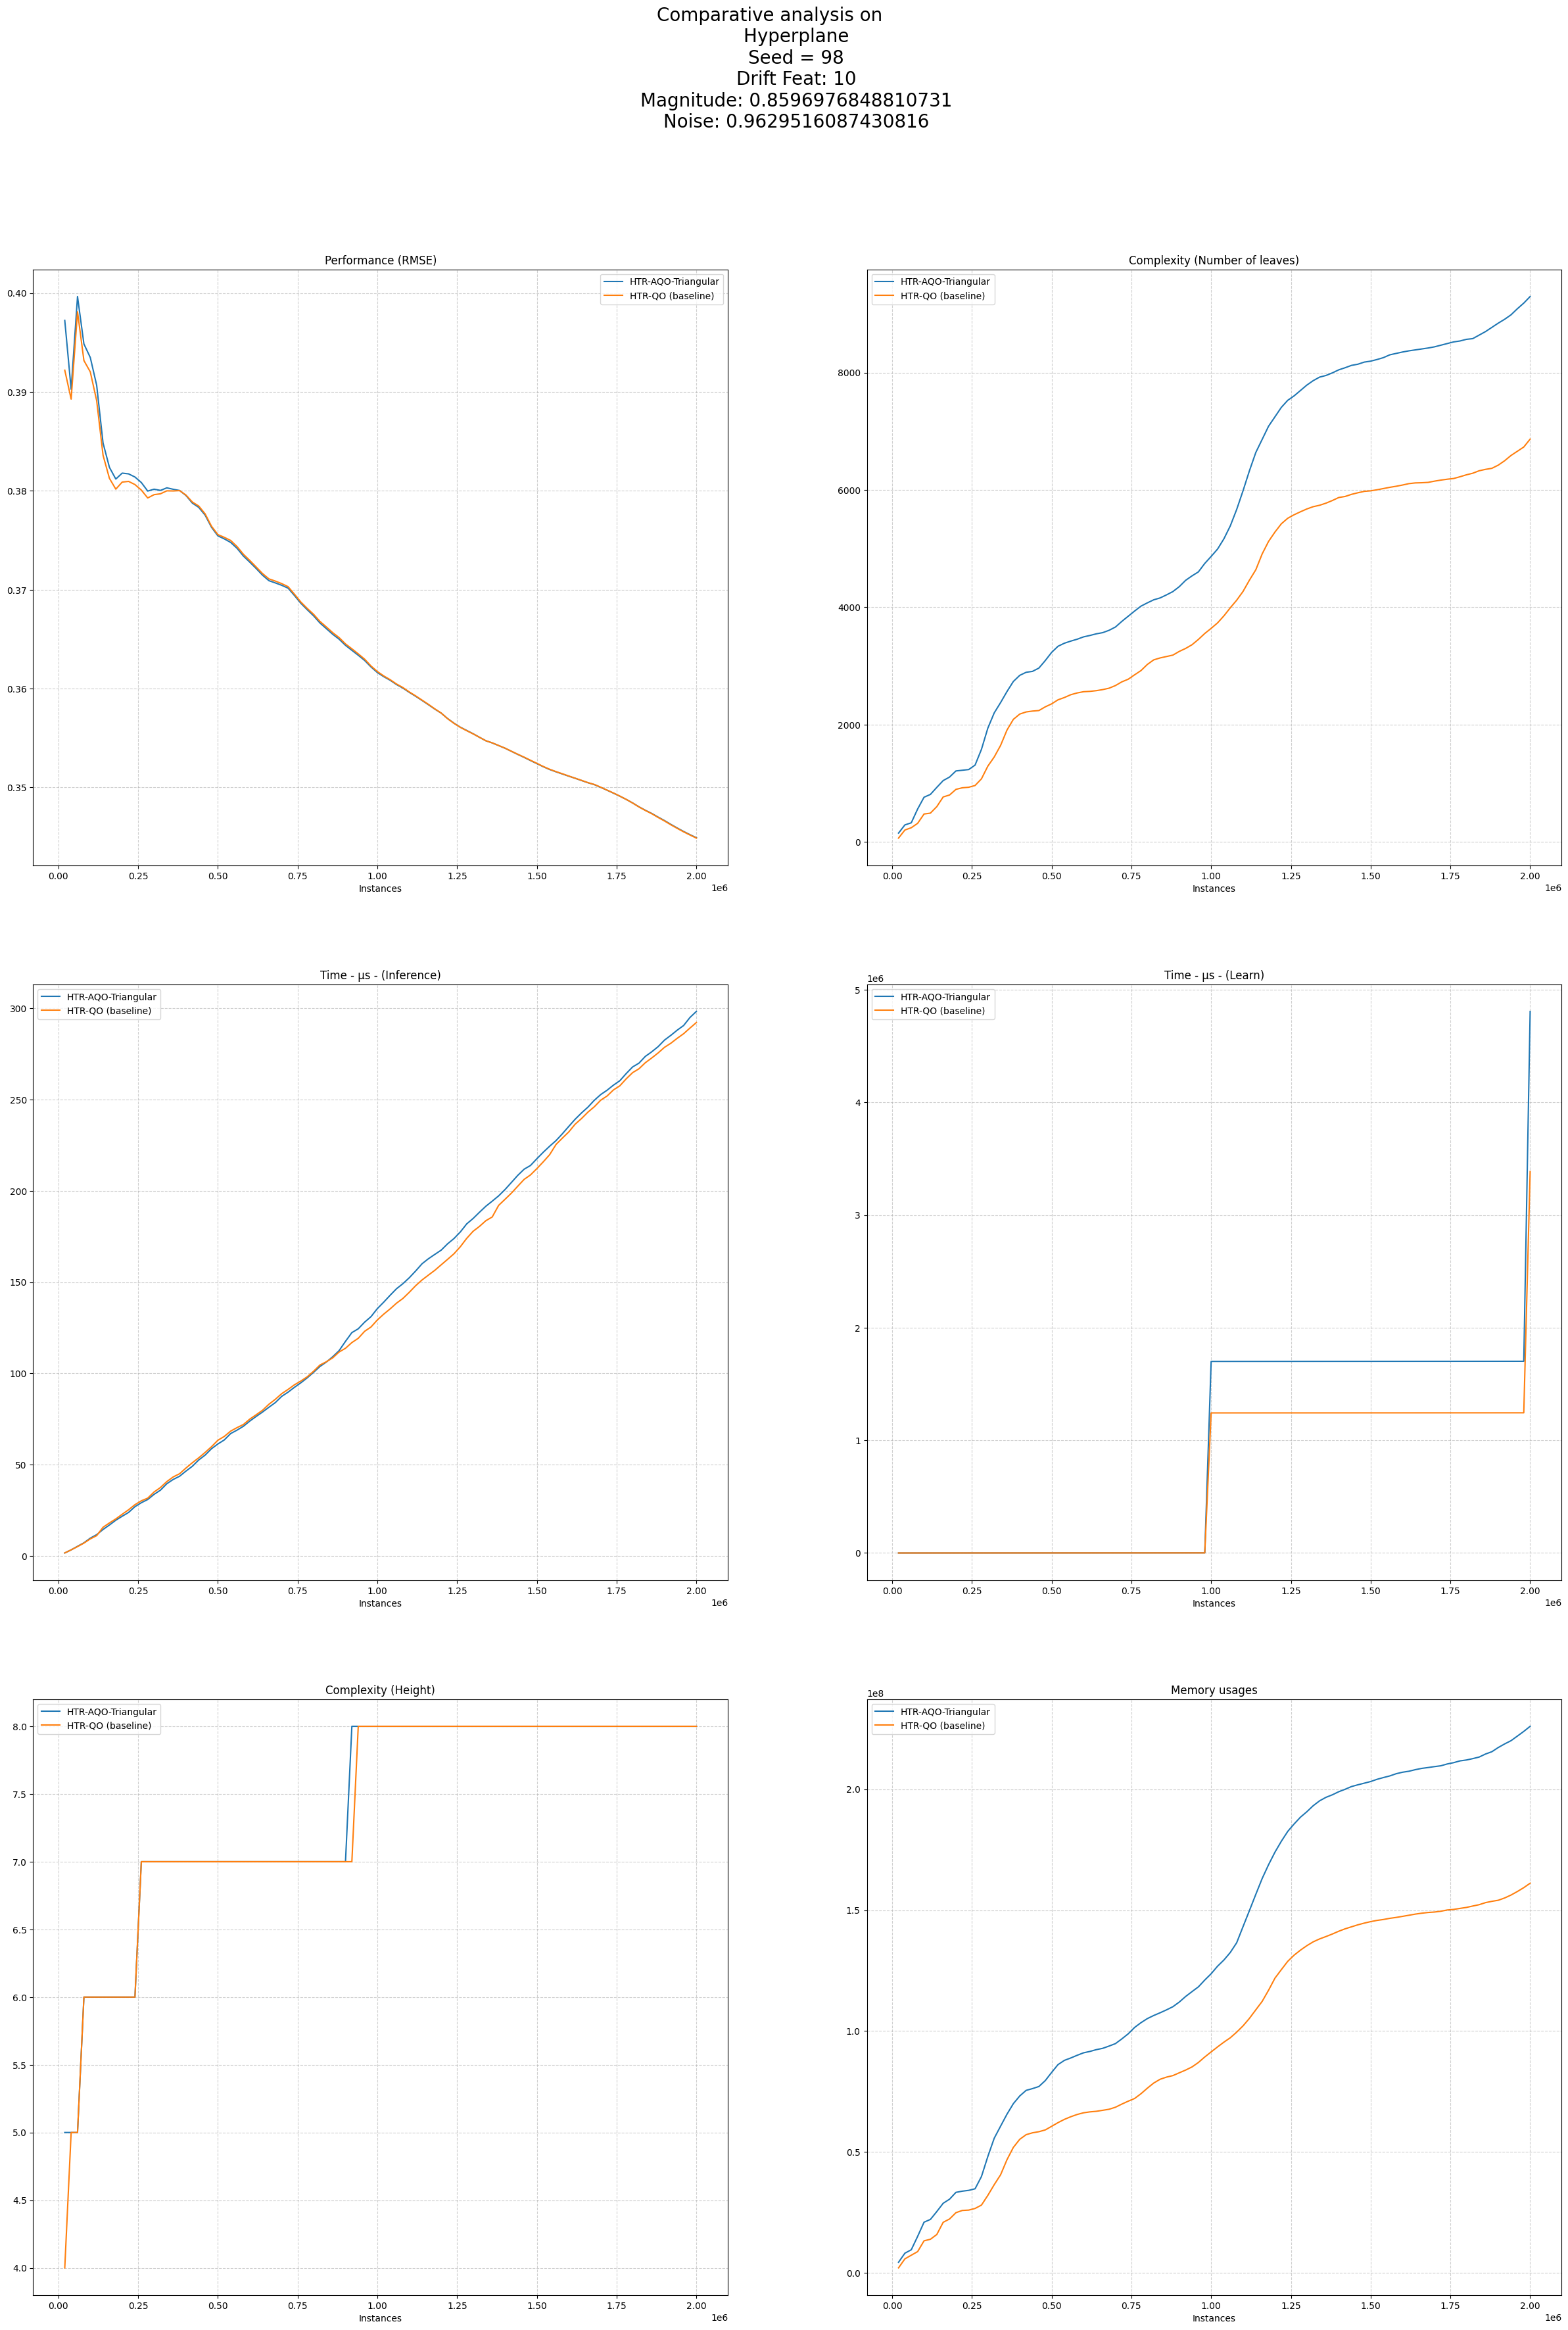

In [4]:
INSTANCES = 2_000_000
synth_datasets = get_hyperplane_datasets(2)
models = get_models()
logs = []
for d_name, dataset_generator in synth_datasets.items():
    for model_name, model in models.items():
        eval_model = {
            model_name: model.clone()
        }
        eval_dataset_stream = {
            d_name: dataset_generator[0].take(INSTANCES)
        }
        logs.append(evaluate(
            eval_dataset_stream,
            eval_model,
            RMSE(),
            print_every=INSTANCES/100
        ))
plot_gen = Plots()
plot_gen.plot_all(logs)

Evaluating HTR-AQO-Triangular on 
        Friedman
        Drift = LEA
        Seed = 93
Final RMSE: 2.201091: 2.201091
--------------------------------------------------
Evaluating HTR-QO (baseline) on 
        Friedman
        Drift = LEA
        Seed = 93
Final RMSE: 2.204907: 2.204907
--------------------------------------------------
Evaluating HTR-AQO-Triangular on 
        Friedman
        Drift = LEA
        Seed = 36
Final RMSE: 2.203017: 2.203017
--------------------------------------------------
Evaluating HTR-QO (baseline) on 
        Friedman
        Drift = LEA
        Seed = 36
Final RMSE: 2.215844: 2.215844
--------------------------------------------------


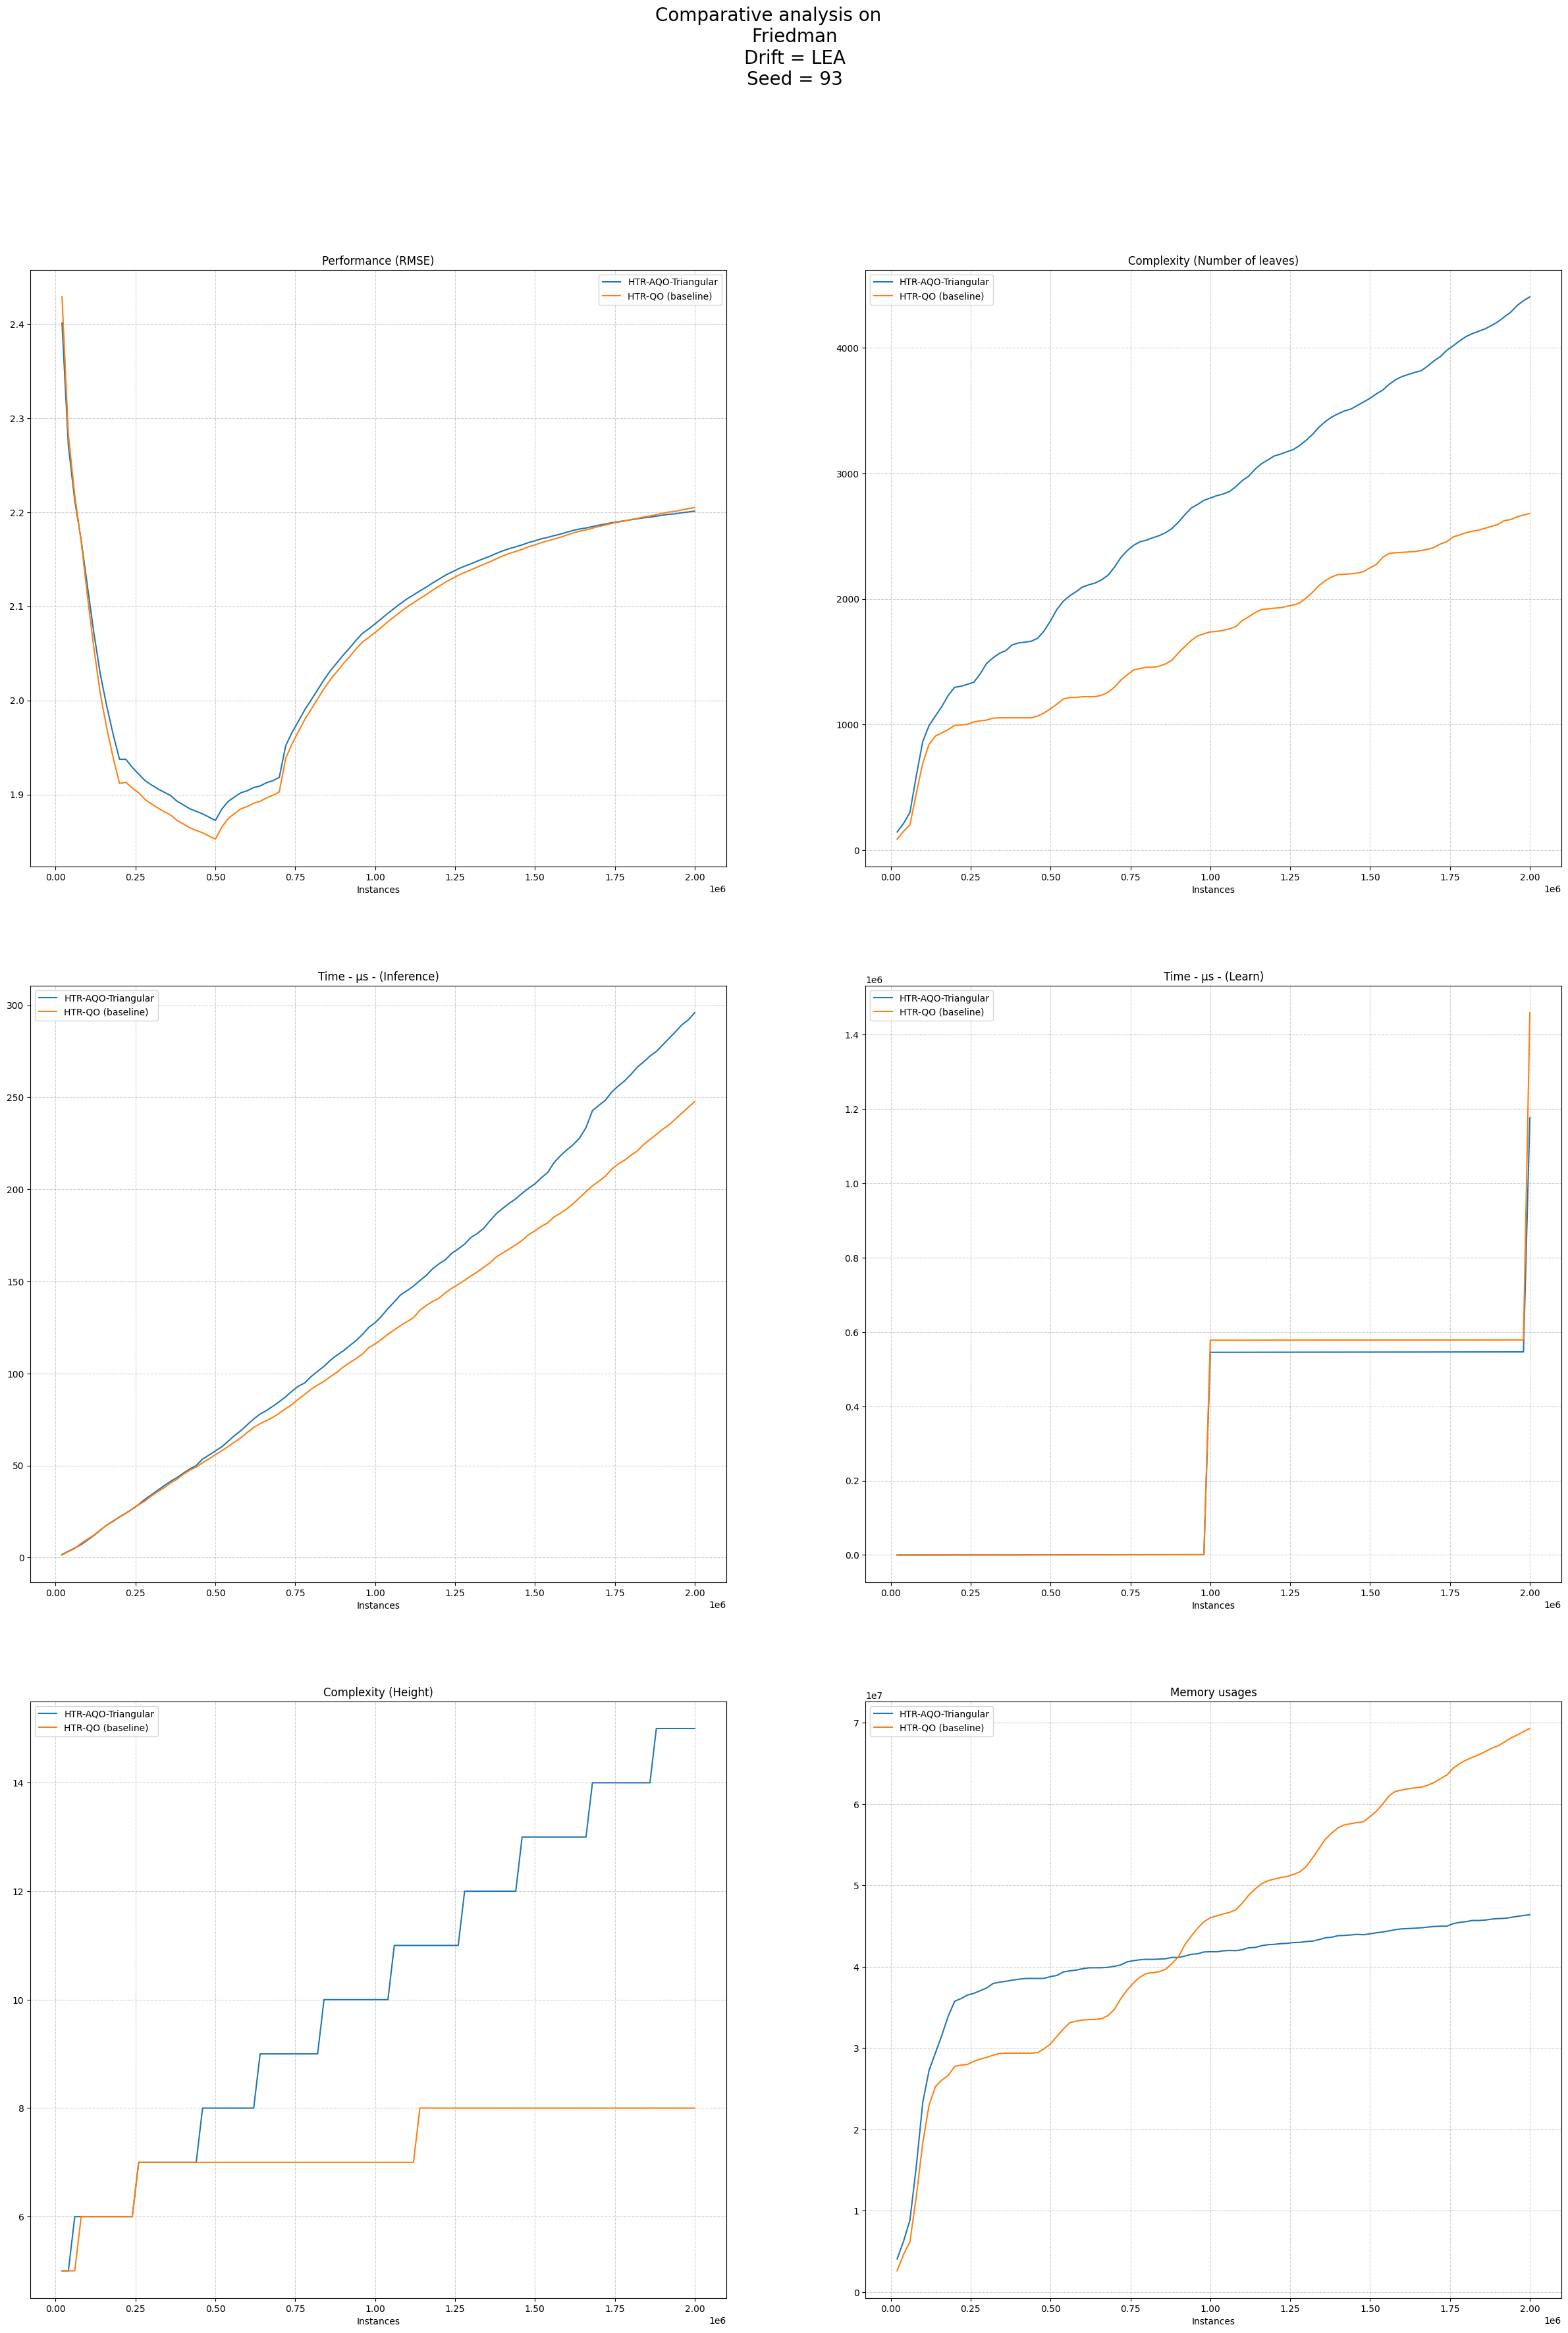

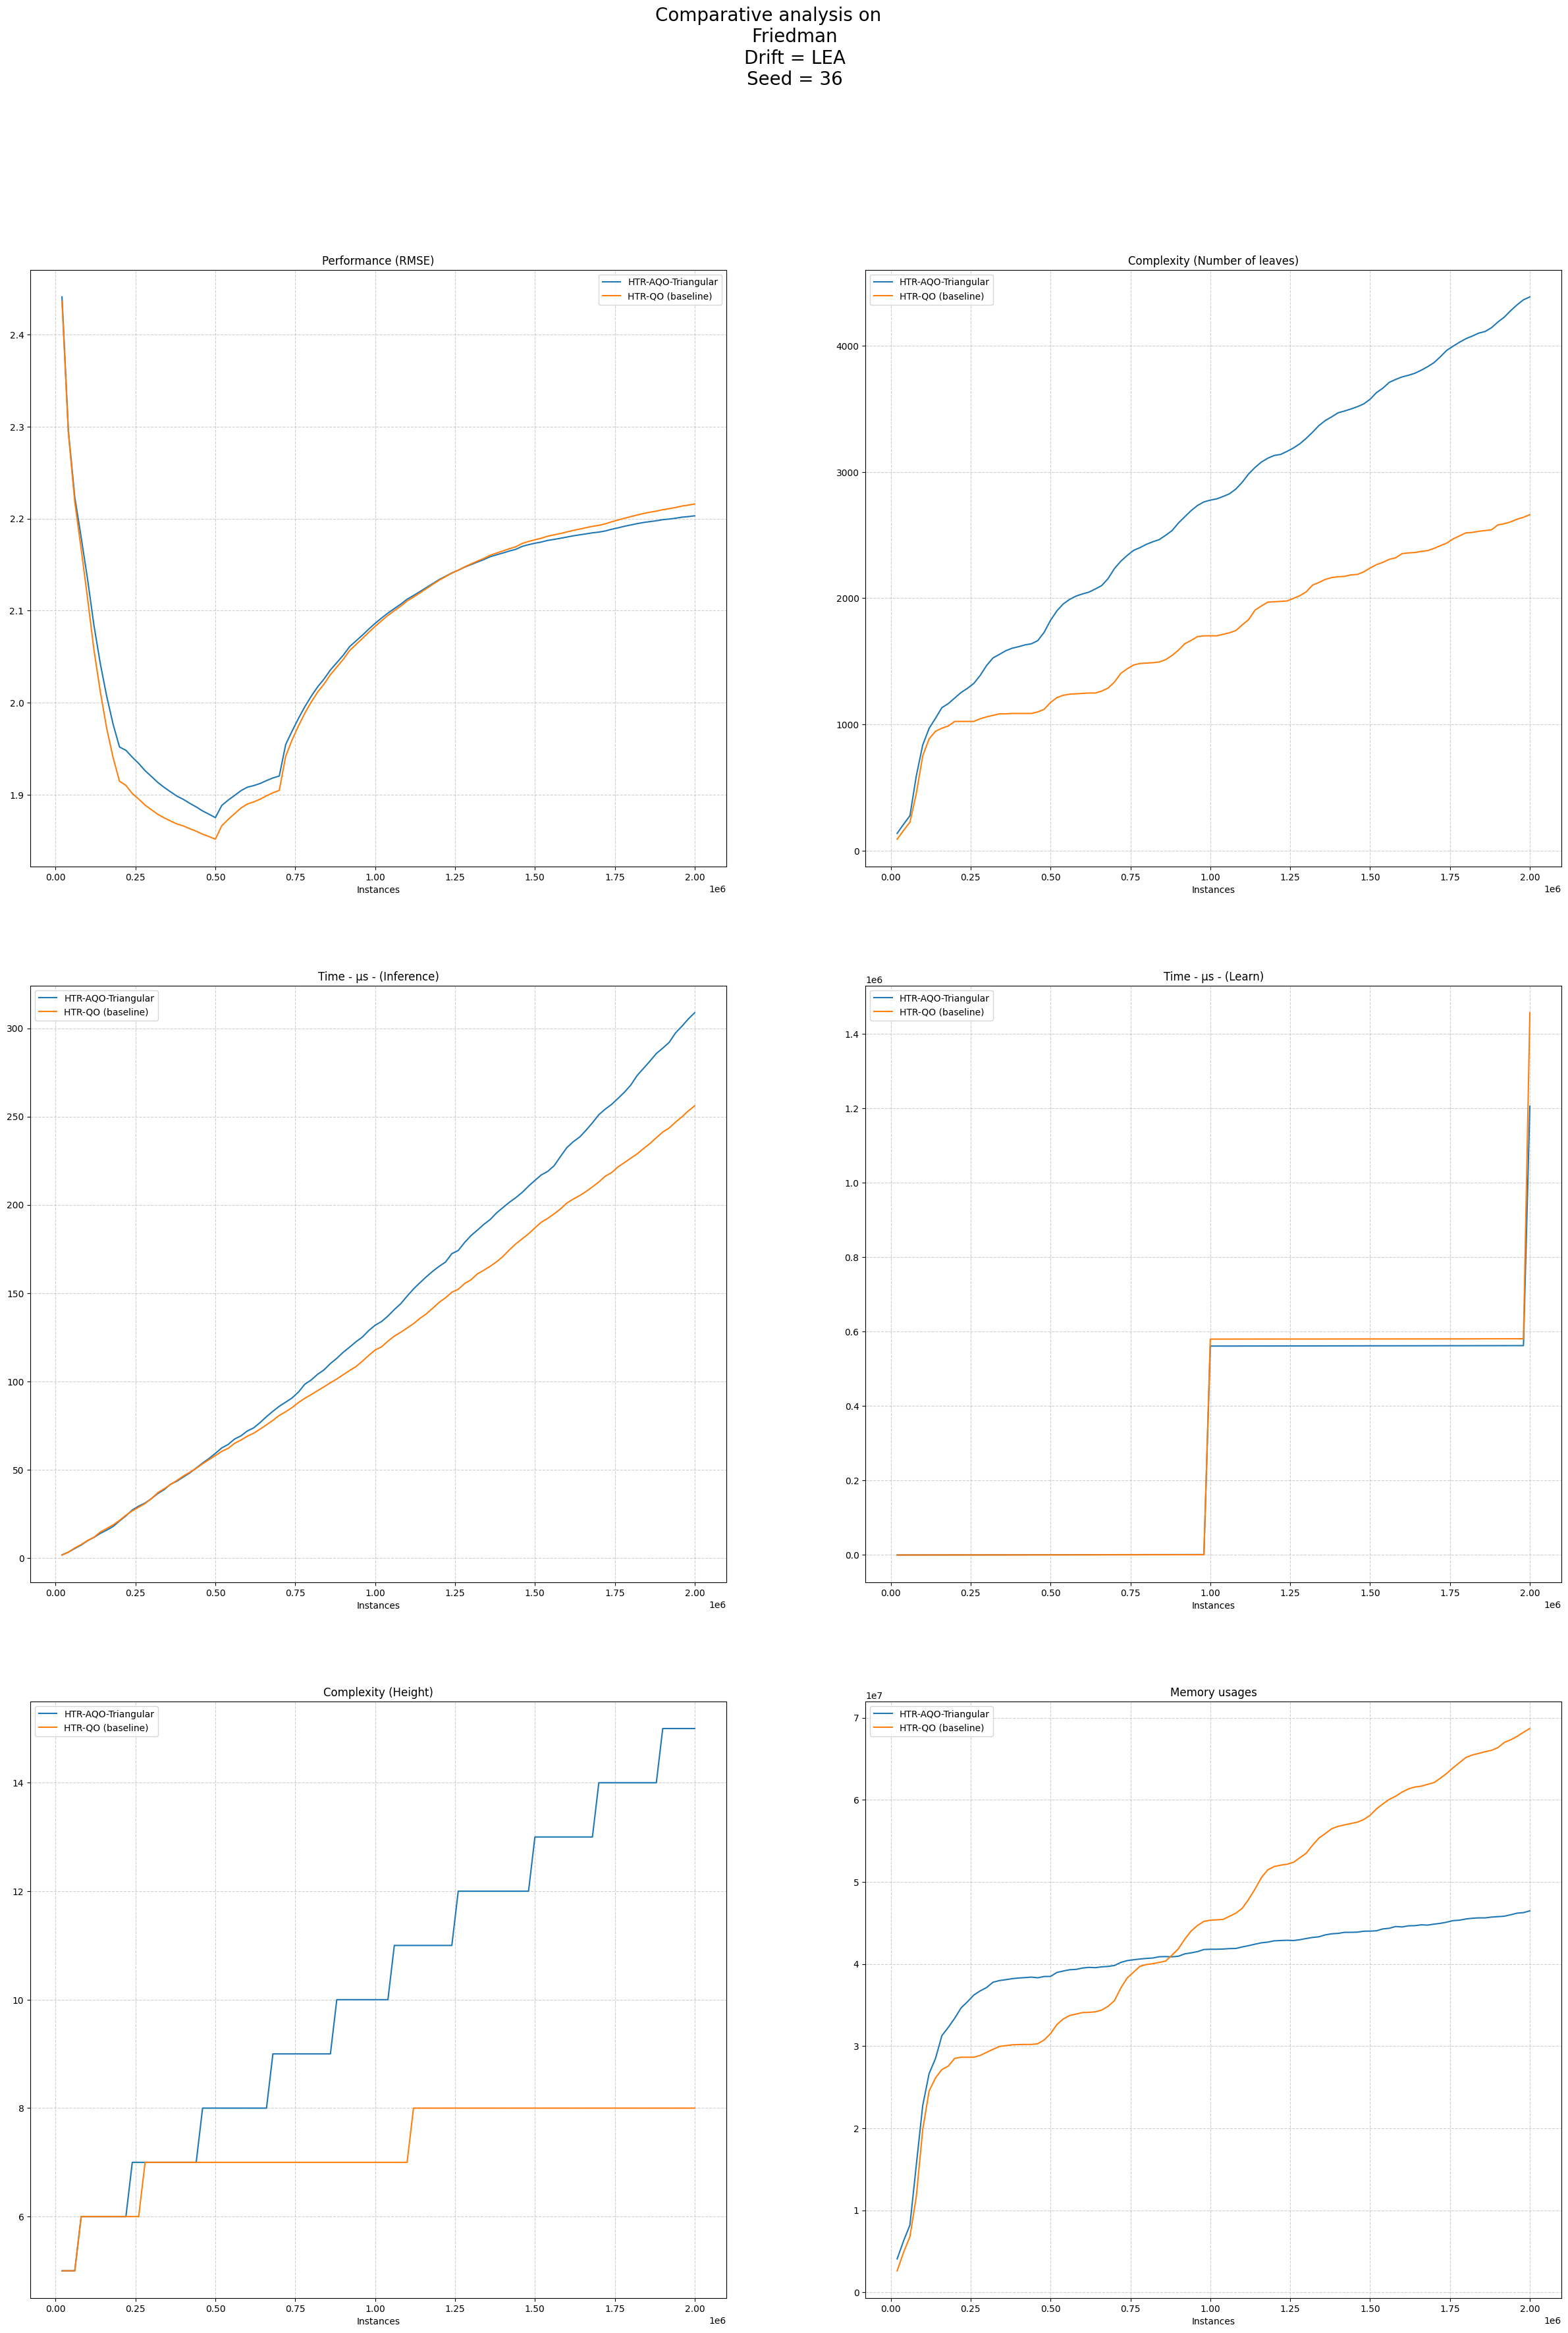

In [6]:
INSTANCES = 2_000_000
synth_datasets = get_friedman_datasets(2, drift="lea")
models = get_models()
logs = []
for d_name, dataset_generator in synth_datasets.items():
    for model_name, model in models.items():
        eval_model = {
            model_name: model.clone()
        }
        eval_dataset_stream = {
            d_name: dataset_generator[0].take(INSTANCES)
        }
        logs.append(evaluate(
            eval_dataset_stream,
            eval_model,
            RMSE(),
            print_every=INSTANCES/100
        ))
plot_gen = Plots()
plot_gen.plot_all(logs)